In [191]:
import numpy as np
import pandas as pd
import photutils as pu
from astropy.io import fits
from photutils import aperture_photometry
from photutils import CircularAperture
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy import units as u
from astropy.coordinates import SkyCoord
from photutils import CircularAnnulus
from astropy import wcs
from astropy.table import Table, hstack, vstack
%matplotlib inline

In [192]:
xcoord = [203,198,787,707,554,685,568,428,176,306]
ycoord = [622,405,545,872,863,600,668,138,196,323]

In [193]:
positions = [(203,622),(198,405),(787,545),(707,872),(554,863),(685,600),(568,668),(428,138),(176,196),(306,323)]
apertures20 = CircularAperture(positions, r=20)
apertures9 = CircularAperture(positions, r=9)
annulus_apertures8_12 = CircularAnnulus(positions, r_in=8, r_out=12)
annulus_apertures14_20 = CircularAnnulus(positions, r_in=14, r_out=20)

In [194]:
image = fits.getdata('/Users/George/Downloads/quadRU.fits')

In [195]:
cd Downloads/

[Errno 2] No such file or directory: 'Downloads/'
/Users/George/Downloads


In [196]:
phot_tableE20 = aperture_photometry(image, apertures20, method='exact')
phot_tableE9 = aperture_photometry(image, apertures9, method='exact')

phot_tableE9

id,xcenter,ycenter,aperture_sum
,pix,pix,
int64,float64,float64,float64
1,203.0,622.0,281562.122338
2,198.0,405.0,496074.718022
3,787.0,545.0,101500.786508
4,707.0,872.0,104421.839337
5,554.0,863.0,196556.421676
6,685.0,600.0,76924.3939862
7,568.0,668.0,92970.4057584
8,428.0,138.0,247973.568332


In [197]:
area_table = (phot_tableE9[1][:]) * (phot_tableE9[2][:])

county = (phot_tableE9[3][:]) / area_table
county

<Quantity [ 2.22991243, 6.18624165, 0.23664546, 0.16937739, 0.41111817,
            0.18716398, 0.24503038, 4.19838765, 2.34829243, 0.78359708] 1 / pix2>

In [198]:
phot_tableC20 = aperture_photometry(image, apertures20, method='center')
phot_tableC9 = aperture_photometry(image, apertures9, method='center')

phot_tableC9

id,xcenter,ycenter,aperture_sum
,pix,pix,
int64,float64,float64,float64
1,203.0,622.0,279977.096149
2,198.0,405.0,494265.630307
3,787.0,545.0,99868.8382972
4,707.0,872.0,102709.217633
5,554.0,863.0,194878.869109
6,685.0,600.0,75397.3044521
7,568.0,668.0,91463.2392124
8,428.0,138.0,246341.185671


In [199]:
phot_tableS20 = aperture_photometry(image, apertures20, method='subpixel')
phot_tableS9 = aperture_photometry(image, apertures9, method='subpixel')

phot_tableS9

id,xcenter,ycenter,aperture_sum
,pix,pix,
int64,float64,float64,float64
1,203.0,622.0,281455.909412
2,198.0,405.0,495955.189113
3,787.0,545.0,101399.866354
4,707.0,872.0,104313.653925
5,554.0,863.0,196455.539503
6,685.0,600.0,76824.7360575
7,568.0,668.0,92879.1889964
8,428.0,138.0,247866.266037


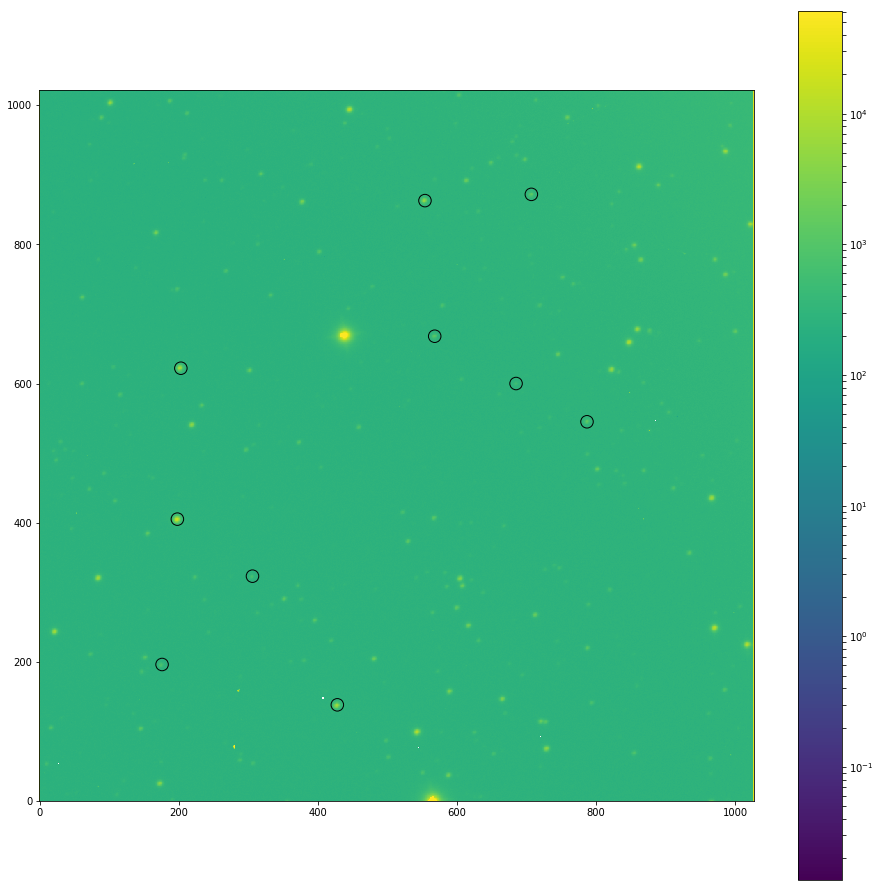

In [139]:
plt.figure(figsize = (16,16))
plt.imshow(image, norm=LogNorm())
apertures9.plot()
plt.gca().invert_yaxis()
plt.colorbar()

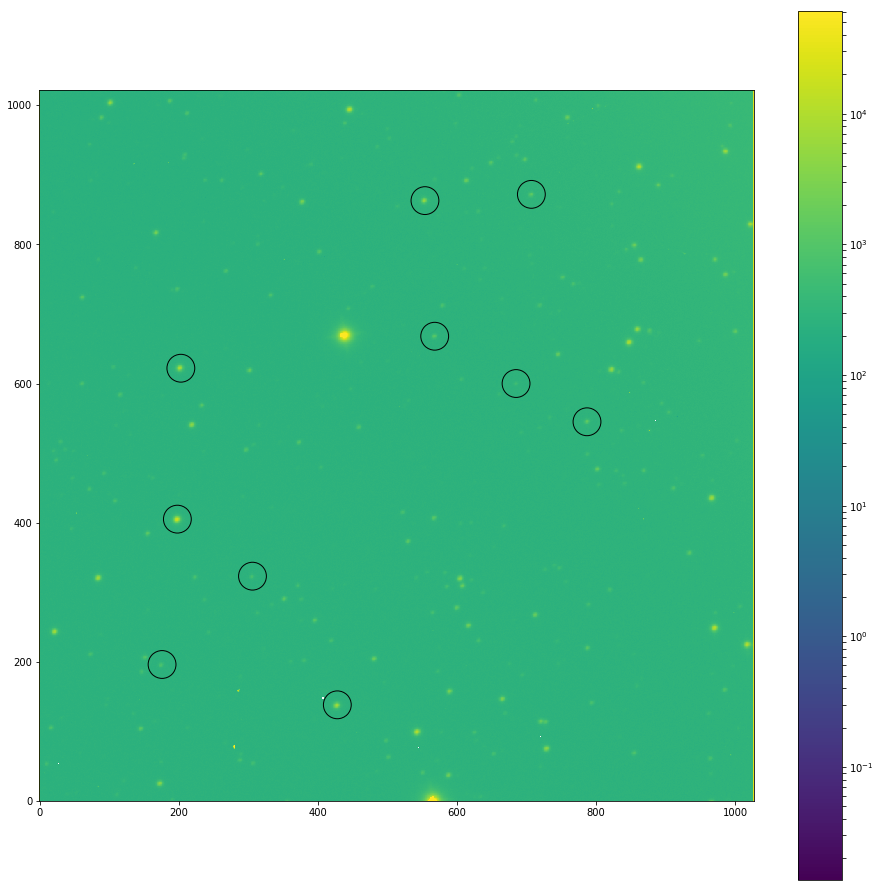

In [140]:
plt.figure(figsize = (16,16))
#plt.figure(phot_tableS5['xcenter'],phot_tableS5['ycenter'])
plt.imshow(image, norm=LogNorm())
apertures20.plot()
plt.gca().invert_yaxis()
plt.colorbar()

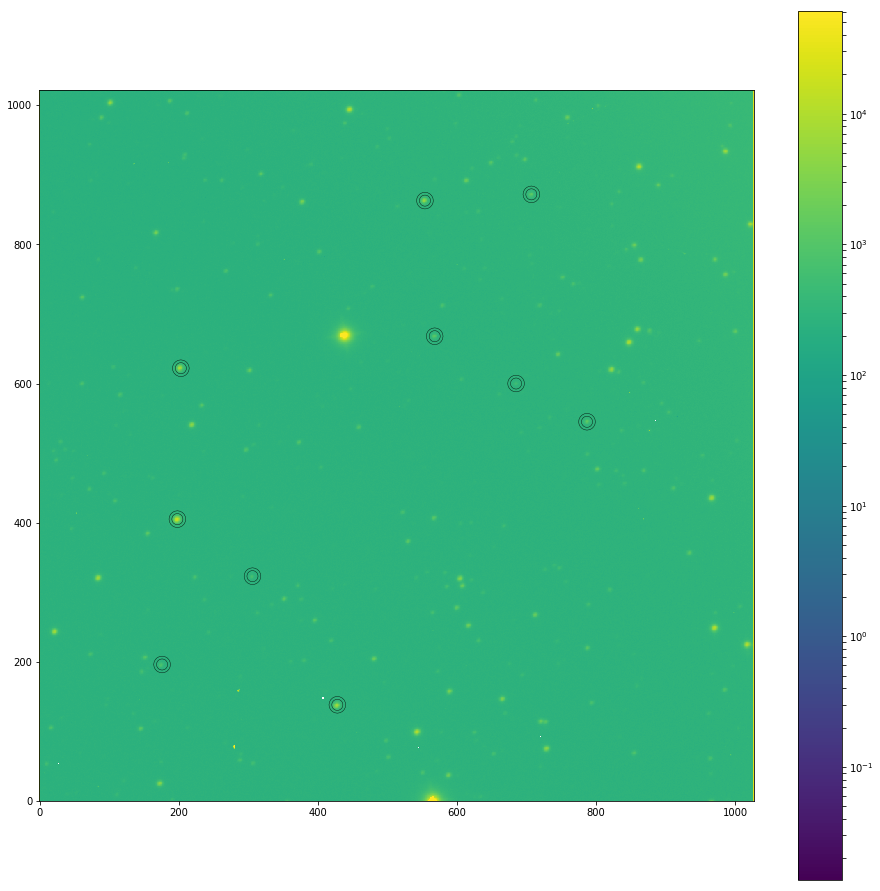

In [141]:
plt.figure(figsize = (16,16))
#plt.figure(phot_tableS5['xcenter'],phot_tableS5['ycenter'])
plt.imshow(image, norm=LogNorm())
annulus_apertures8_12.plot(linewidth=0.4)
plt.gca().invert_yaxis()
plt.colorbar()

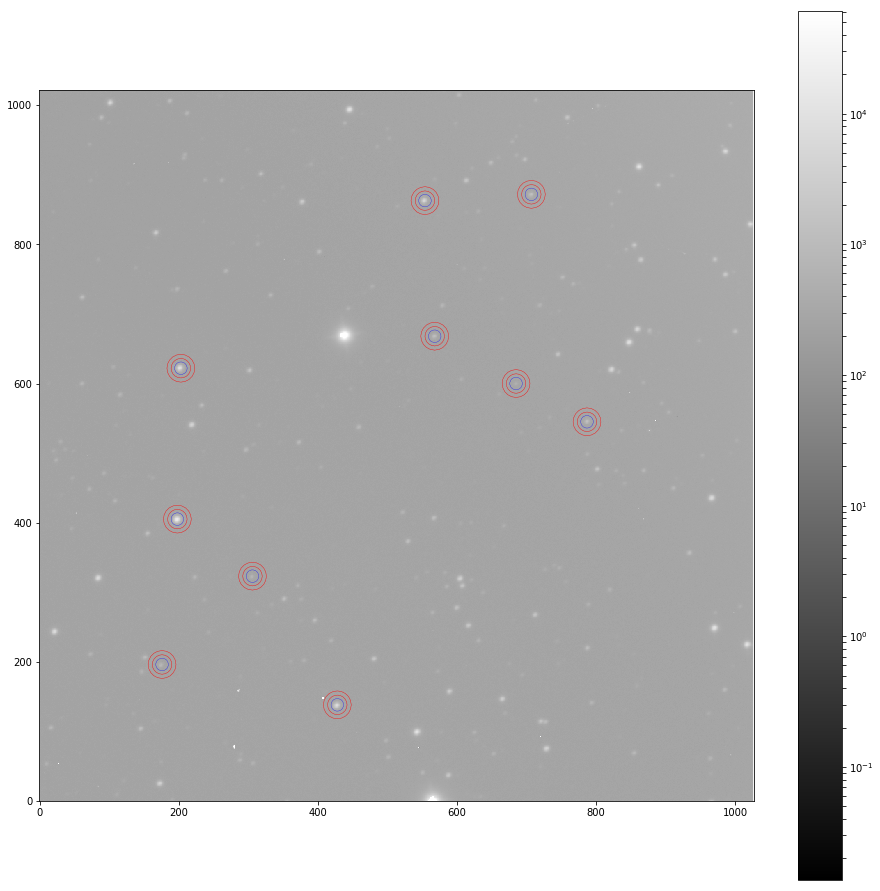

In [142]:
plt.figure(figsize = (16,16))
#plt.figure(phot_tableS5['xcenter'],phot_tableS5['ycenter'])
plt.imshow(image, cmap='gray',norm=LogNorm())
apertures9.plot(color='blue',linewidth=0.3)
annulus_apertures14_20.plot(linewidth = 0.4,color='red')
plt.gca().invert_yaxis()
plt.colorbar()

In [200]:
apers = [apertures9, annulus_apertures14_20]
phot_table = aperture_photometry(image, apers)
phot_table
# aperture_sum_1 is the annuli sum

id,xcenter,ycenter,aperture_sum_0,aperture_sum_1
,pix,pix,,
int64,float64,float64,float64,float64
1,203.0,622.0,281562.122338,165221.176841
2,198.0,405.0,496074.718022,170359.249555
3,787.0,545.0,101500.786508,182523.885018
4,707.0,872.0,104421.839337,194562.671954
5,554.0,863.0,196556.421676,181884.974822
6,685.0,600.0,76924.3939862,178428.20578
7,568.0,668.0,92970.4057584,172600.30686
8,428.0,138.0,247973.568332,171126.294511


In [201]:
# take annuli counts sum divided by the area of the annuli -> avg counts per pixel
bkg_mean = phot_table['aperture_sum_1'] / annulus_apertures14_20.area()
bkg_sum = bkg_mean * apertures9.area()
print(bkg_sum)
# subtract calculated background
final_sum = phot_table['aperture_sum_0'] - bkg_sum
phot_table['residual_aperture_sum'] = final_sum
print(phot_table['residual_aperture_sum'])
# -> counts of aperture with background subtracted
phot_table['residual_aperture_sum']

aperture_sum_1
--------------
 65602.5260985
 67642.6432056
 72472.7190512
 77252.8256286
 72219.0341203
 70846.4934716
 68532.4747826
 67947.2051735
  66809.021835
 66709.0814857
residual_aperture_sum
---------------------
        215959.596239
        428432.074817
        29028.0674572
        27169.0137083
        124337.387556
        6077.90051457
        24437.9309758
        180026.363158
        14197.6738505
        10740.0863402


215959.596239
428432.074817
29028.0674572
27169.0137083
124337.387556
6077.90051457
24437.9309758
180026.363158
14197.6738505
10740.0863402


In [202]:
arr = np.linspace(5,20,40)
#Q for aperture, R for annuli
Q = []
R = []
for i in arr:
    aperturesX = CircularAperture(positions, r=i)
    annuliX = CircularAnnulus(positions, r_in = (i+6), r_out = (i+12))
    Q.append(aperturesX)
    R.append(annuliX)

In [223]:
ap_tableX = aperture_photometry(image, Q, method='subpixel') 
an_tableX = aperture_photometry(image, R, method='subpixel') 

In [224]:
avg_countX = []
for i in range(40):
    bg_mean = an_tableX[7][3+i] / R[i].area()
    bg_sum = bg_mean * Q[i].area()
    fin_sum = ap_tableX[7][3+i] - bg_sum
    avg_countX.append(fin_sum)

In [225]:
#other method: subpixel
ap_tableC = aperture_photometry(image, Q, method='center') 
an_tableC = aperture_photometry(image, R, method='center')

avg_countS = []
for i in range(40):
    bg_mean = an_tableC[7][3+i] / R[i].area()
    bg_sum = bg_mean * Q[i].area()
    fin_sum = ap_tableC[7][3+i] - bg_sum
    avg_countS.append(fin_sum)

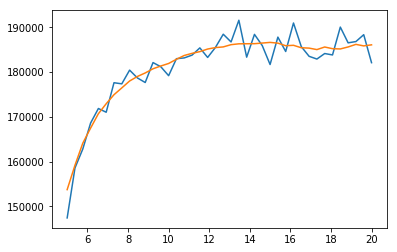

In [226]:
plt.plot(arr, avg_countS)
plt.plot(arr, avg_countX)

In [207]:
from photutils.detection import IRAFStarFinder
from photutils.psf import IntegratedGaussianPRF, DAOGroup
from photutils.background import MMMBackground, MADStdBackgroundRMS
from astropy.modeling.fitting import LevMarLSQFitter
from astropy.stats import gaussian_sigma_to_fwhm
from photutils.psf import IterativelySubtractedPSFPhotometry

In [208]:
sigma_psf = 2.0
bkgrms = MADStdBackgroundRMS()
std = bkgrms(image)
iraffind = IRAFStarFinder(threshold=3.5*std,
                          fwhm=sigma_psf*gaussian_sigma_to_fwhm, 
                          minsep_fwhm=0.01, roundhi=5.0, roundlo=-5.0, 
                          sharplo=0.0, sharphi=2.0)
daogroup = DAOGroup(2.0*sigma_psf*gaussian_sigma_to_fwhm)
mmm_bkg = MMMBackground()
fitter = LevMarLSQFitter()
psf_model = IntegratedGaussianPRF(sigma=sigma_psf)
photometry = IterativelySubtractedPSFPhotometry(finder=iraffind,group_maker=daogroup,
                                                bkg_estimator=mmm_bkg,psf_model=psf_model,
                                                fitter=LevMarLSQFitter(),niters=1, 
                                                fitshape=(11,11))
result_tab = photometry(image=image)
residual_image = photometry.get_residual_image()

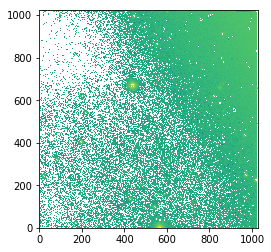

In [209]:
plt.imshow(residual_image, cmap='viridis', norm=LogNorm(), aspect=1,interpolation='nearest', origin='lower')

In [210]:
type(result_tab)

astropy.table.table.Table

In [211]:
result_tab

flux_0,x_fit,x_0,y_fit,y_0,flux_fit,id,group_id,flux_unc,x_0_unc,y_0_unc,iter_detected
float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,int32
3347.19613853,356.053781869,355.994072713,-1.51998020601,0.640127897263,10428.4237236,1,1,722.662702587,0.0629788457797,0.140092620677,1
427419.578134,580.490390277,555.810656192,-28.6970630754,1.10254192138,986534.741867,2,2,2488.54598283,2488.54598283,2488.54598283,1
2206492.07931,561.241891501,561.465126865,0.454085092074,1.32778989096,1796800.29724,3,2,2297.55014065,2297.55014065,2297.55014065,1
2129546.08101,567.5671373,568.256358374,0.33920051602,1.22747826099,1343200.6503,4,2,2201.76513351,2201.76513351,2201.76513351,1
456538.114248,569.997399339,574.082623392,0.581609557017,1.12179946716,654071.740491,5,2,2096.67044943,2096.67044943,2096.67044943,1
2791697.73009,564.725840629,564.860685413,4.09643180031,4.19694984415,1677858.64002,11,2,1945.06348094,1945.06348094,1945.06348094,1
9522.17304516,965.460016504,965.768702939,-1.96344921025,0.539137232101,36236.6196582,6,3,3923.5788526,0.0755630666636,0.188173746124,1
401800.64864,1025.38519456,1025.44280544,0.68600484764,1.76638323071,577499.187224,7,4,1019.50555665,1019.50555665,1019.50555665,1
542183.091619,1027.97878855,1025.41418673,5.0886676135,5.00836149295,932546.89195,12,4,1019.52293111,1019.52293111,1019.52293111,1


In [212]:
c1 = result_tab[np.logical_and(result_tab['y_0']>=621, result_tab['y_0']<=623)]
c1 = c1[1]
c2 = result_tab[np.logical_and(result_tab['y_0']>=404, result_tab['y_0']<=406)]
c2 = c2[0]
c3 = result_tab[np.logical_and(result_tab['y_0']>=544, result_tab['y_0']<=546)]
c3 = c3[3]
c4 = result_tab[np.logical_and(result_tab['y_0']>=870, result_tab['y_0']<=874)]
c4=c4[1]
c5 = result_tab[np.logical_and(result_tab['y_0']>=862, result_tab['y_0']<=864)]
c5=c5[2]
c6 = result_tab[np.logical_and(result_tab['y_0']>=599, result_tab['y_0']<=601)]
c6 = c6[2]
c7 = result_tab[np.logical_and(result_tab['y_0']>=667, result_tab['y_0']<=669)]
c7 = c7[2]
c8 = result_tab[np.logical_and(result_tab['y_0']>=136, result_tab['y_0']<=140)]
c8 = c8[2]
c9 = result_tab[np.logical_and(result_tab['y_0']>=194, result_tab['y_0']<=198)]
c9 = c9[3]
c10= result_tab[np.logical_and(result_tab['y_0']>=321, result_tab['y_0']<=325)]
c10 = c10[3]

In [213]:
cTable = vstack([c1,c2,c3,c4,c5,c6,c7,c8,c9,c10])

In [214]:
cTable

flux_0,x_fit,x_0,y_fit,y_0,flux_fit,id,group_id,flux_unc,x_0_unc,y_0_unc,iter_detected
float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,int32
187776.526341,201.666458395,201.774024597,621.668613001,621.758750437,207396.274923,483,215,2047.53537528,0.0282404423031,0.0282435619787,1
371824.425791,197.71688909,197.77442356,404.201158187,404.1858872,408486.419414,315,139,3720.64478448,0.0260536919757,0.0260539384693,1
26984.8015045,786.508131242,786.658097393,544.723017925,544.815823255,28751.2931152,415,193,312.501662673,0.0311030992556,0.0310881704875,1
26794.727886,706.347427681,706.275748366,870.853168295,870.872635836,28611.1614434,646,284,348.6541067,0.0348630688923,0.0348543829492,1
110004.75981,552.834956194,552.854780173,862.26148946,862.226728909,121055.560252,641,283,1193.01856003,0.0281838410156,0.0281954470804,1
6940.468181,684.577299312,684.709432868,599.120545273,599.105597169,7080.46912372,468,208,145.787165665,0.0589093859679,0.0588901434572,1
22211.9517777,567.282175577,567.199130519,667.285093936,667.214763747,24244.3082794,507,224,259.061348317,0.0305669001444,0.0305691199732,1
156361.014405,427.164563745,427.125163134,136.885721792,136.89632864,170312.164286,131,56,1571.58831523,0.026394546635,0.0263909033968,1
12762.9601668,174.673547191,174.770341842,194.821625044,194.856015655,14057.1038485,174,76,177.573273964,0.0361369130154,0.0361308144527,1


In [215]:
xcoord = [203,198,787,707,554,685,568,428,176,306]
ycoord = [622,405,545,872,863,600,668,138,196,323]

In [216]:
z = np.linspace(1,10,10)

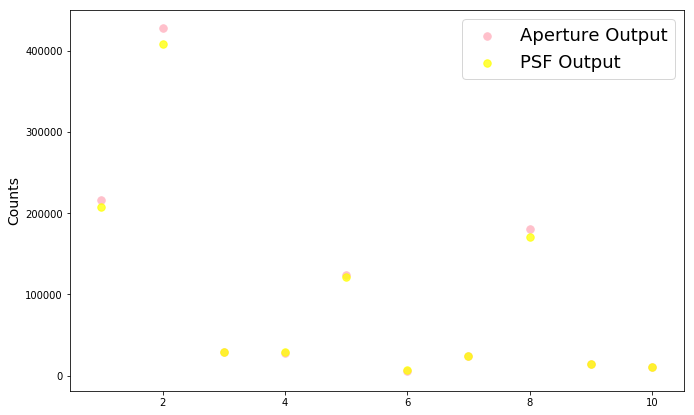

In [227]:
fig, ax = plt.subplots(figsize=(11,7))
plt.ylabel('Counts', fontsize=14)
ax.scatter(phot_table['id'], phot_table['residual_aperture_sum'], c='pink', label='Aperture Output', s=56)
ax.scatter(z, cTable['flux_fit'], c='yellow', alpha=0.75, label='PSF Output', s=56)
plt.legend(loc='upper right', fontsize=18)